In [1]:
import numpy as np
import cantera as ct
import matplotlib
import matplotlib.pyplot as plt

## Influence of equivalence ratio on the Flame Temperature of burned gases (H2/O2)

In [2]:
P0=ct.one_atm
T0=300
t0 = 50
T=np.linspace(50,300,100)
#T = np.array([3000,3200,3400,3600,3800,4000],'d')
P=np.array([1e5,1e7],'d')
gas=ct.Solution('gri30.yaml')
ih2o=gas.species_index('H2O')
#spec = ct.Species.list_from_file('gri30.yaml')
#gas = ct.Solution(thermo='ideal-gas', species=spec[ih2o])
Tad1 = []
Tad2 = []
tad1 = []
tad2 = []
phi = []
Q = 0.2
while(Q < 8.0):
    Z = 0.5 / Q
    gas.TPX = T0, 1e5,'H2:1,O2:'+str(Z)
    gas.equilibrate('HP')
    Td = gas.T
    Tad1.append(Td)
    phi.append(Q)
    Q += 0.1
    
Q = 0.2
while(Q < 8.0):
    Z = 0.5 / Q
    gas.TPX = T0, 1e7,'H2:1,O2:'+str(Z)
    gas.equilibrate('HP')
    Td = gas.T
    Tad2.append(Td)
    Q += 0.1
    
Q = 0.2
while(Q < 8.0):
    Z = 0.5 / Q
    gas.TPX = t0, 1e5,'H2:1,O2:'+str(Z)
    gas.equilibrate('HP')
    Td = gas.T
    tad1.append(Td)
    Q += 0.1

Q = 0.2
while(Q < 8.0):
    Z = 0.5 / Q
    gas.TPX = t0, 1e7,'H2:1,O2:'+str(Z)
    gas.equilibrate('HP')
    Td = gas.T
    tad2.append(Td)
    Q += 0.1

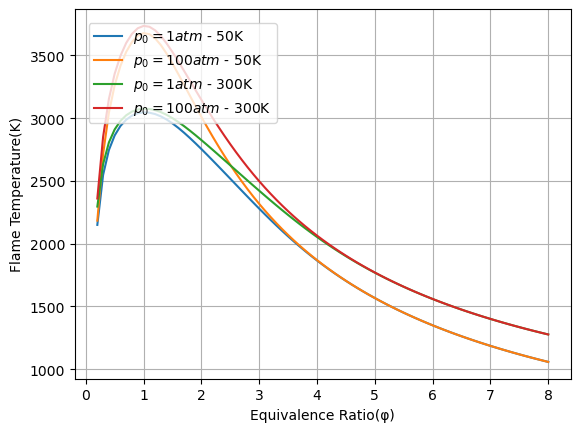

In [8]:
plt.plot(phi[:], tad1,label='$p_0=1atm$ - 50K')
plt.plot(phi[:], tad2,label='$p_0=100atm$ - 50K')
plt.plot(phi[:], Tad1,label='$p_0=1atm$ - 300K')
plt.plot(phi[:], Tad2,label='$p_0=100atm$ - 300K')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1.)
plt.grid()
plt.xlabel('Equivalence Ratio(φ)')
plt.ylabel('Flame Temperature(K)')
plt.show()